<a href="https://colab.research.google.com/github/VascoBartolo/ML_project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.iloc[:,2:14]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


# Nova secção

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data['waterfront'].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [ ]:
data['view'].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

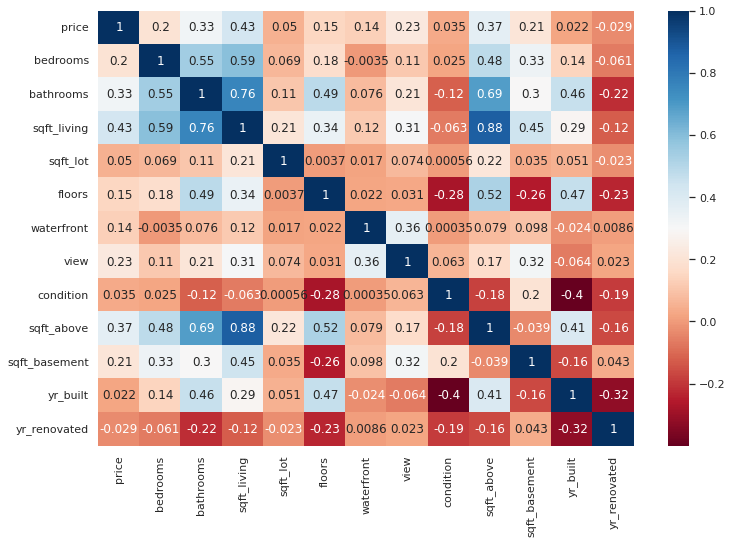

In [ ]:
cor=data.corr()
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(cor, annot=True,cmap='RdBu');

Highest correlations are between area of living room, area of the house and number of bathrooms.

Regarding price the variables with higher correlation are areas of living rooms and area of the house.

In [ ]:
#Now we will separate the target attribute from the features of our model
#Date of registration is not a feature for regression

x = data.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis=1)
#x1 = data.drop(['price'], axis=1)
y = data['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
train, test = np.split(data.sample(frac=1), [int(0.8*len(data))])
#X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy

def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [ ]:
_, X_train_temp, y_train_temp = get_xy(train, "price", x_labels=["bedrooms",	"bathrooms", "sqft_living",	"sqft_lot",	"floors",	"waterfront",	"view",	"condition",	"sqft_above",	"sqft_basement",	"yr_built",	"yr_renovated"])
_, X_test_temp, y_test_temp = get_xy(test, "price", x_labels=["bedrooms",	"bathrooms", "sqft_living",	"sqft_lot",	"floors",	"waterfront",	"view",	"condition",	"sqft_above",	"sqft_basement",	"yr_built",	"yr_renovated"])

In [ ]:
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state=1)
#X_smote, y_smote = sm.fit_resample(X_train, y_train.astype('int'))

## Defining the algorithms we are going to use

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Fit models to training dataset
linear_reg = LinearRegression()
linear_reg.fit(X_train_temp, y_train_temp)

kn_reg = KNeighborsRegressor(n_neighbors=2)
kn_reg.fit(X_train_temp, y_train_temp)

dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(X_train_temp, y_train_temp) 

rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train_temp, y_train_temp)

xgb_reg = xgb.XGBRegressor(random_state=0)
xgb_reg.fit(X_train_temp, y_train_temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[17:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Predicting inferences from training data

In [ ]:
y_pred_train_lr = linear_reg.predict(X_train_temp)
y_pred_train_kn = kn_reg.predict(X_train_temp)
y_pred_train_dt = dt_reg.predict(X_train_temp)
y_pred_train_rf = rf_reg.predict(X_train_temp)
y_pred_train_xgb = xgb_reg.predict(X_train_temp)

## Check performance measures with test data

In [ ]:
from sklearn.metrics import mean_squared_error
#Root mean squared error
rmse_lr=mean_squared_error(y_train_temp, y_pred_train_lr, squared=False)
rmse_kn=mean_squared_error(y_train_temp, y_pred_train_kn, squared=False)
rmse_dt=mean_squared_error(y_train_temp, y_pred_train_dt, squared=False)
rmse_rf=mean_squared_error(y_train_temp, y_pred_train_rf, squared=False)
rmse_xgb=mean_squared_error(y_train_temp, y_pred_train_rf, squared=False)

from sklearn.metrics import mean_absolute_error
#Mean absolute error
mae_lr=mean_absolute_error(y_train_temp, y_pred_train_lr)
mae_kn=mean_absolute_error(y_train_temp, y_pred_train_kn)
mae_dt=mean_absolute_error(y_train_temp, y_pred_train_dt)
mae_rf=mean_absolute_error(y_train_temp, y_pred_train_rf)
mae_xgb=mean_absolute_error(y_train_temp, y_pred_train_rf)

from sklearn.metrics import mean_absolute_percentage_error
#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_train_temp, y_pred_train_lr)
mape_kn=mean_absolute_percentage_error(y_train_temp, y_pred_train_kn)
mape_dt=mean_absolute_percentage_error(y_train_temp, y_pred_train_dt)
mape_rf=mean_absolute_percentage_error(y_train_temp, y_pred_train_rf)
mape_xgb=mean_absolute_percentage_error(y_train_temp, y_pred_train_rf)

from sklearn.metrics import median_absolute_error
#Median absolute error
#The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
medae_lr=median_absolute_error(y_train_temp, y_pred_train_lr)
medae_kn=median_absolute_error(y_train_temp, y_pred_train_kn)
medae_dt=median_absolute_error(y_train_temp, y_pred_train_dt)
medae_rf=median_absolute_error(y_train_temp, y_pred_train_rf)
medae_xgb=median_absolute_error(y_train_temp, y_pred_train_rf)

from sklearn.metrics import r2_score
#R² score, the coefficient of determination
r2_lr=r2_score(y_train_temp, y_pred_train_lr)
r2_kn=r2_score(y_train_temp, y_pred_train_kn)
r2_dt=r2_score(y_train_temp, y_pred_train_dt)
r2_rf=r2_score(y_train_temp, y_pred_train_rf)
r2_xgb=r2_score(y_train_temp, y_pred_train_rf)

#Generate a comparison table
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,502874.710684,166185.922789,3.899976e+19,109494.432998,0.207171
KNeighborsRegressor,419273.177274,122659.126508,1.779268e+19,72500.000000,0.448870
DecisionTreeRegressor,303.064063,7.065217,2.510732e-05,0.000000,1.000000
RandomForestRegressor,223547.197040,65570.337715,1.467690e+19,38337.455000,0.843326
XGBoost,223547.197040,65570.337715,1.467690e+19,38337.455000,0.843326


# For the test sample

In [ ]:
y_pred_test_lr = linear_reg.predict(X_test_temp)
y_pred_test_kn = kn_reg.predict(X_test_temp)
y_pred_test_dt = dt_reg.predict(X_test_temp)
y_pred_test_rf = rf_reg.predict(X_test_temp)
y_pred_test_xgb = xgb_reg.predict(X_test_temp)

In [ ]:

#Root mean squared error
rmse_lr=mean_squared_error(y_test_temp, y_pred_test_lr, squared=False)
rmse_kn=mean_squared_error(y_test_temp, y_pred_test_kn, squared=False)
rmse_dt=mean_squared_error(y_test_temp, y_pred_test_dt, squared=False)
rmse_rf=mean_squared_error(y_test_temp, y_pred_test_rf, squared=False)
rmse_xgb=mean_squared_error(y_test_temp, y_pred_test_xgb, squared=False)

#Mean absolute error
mae_lr=mean_absolute_error(y_test_temp, y_pred_test_lr)
mae_kn=mean_absolute_error(y_test_temp, y_pred_test_kn)
mae_dt=mean_absolute_error(y_test_temp, y_pred_test_dt)
mae_rf=mean_absolute_error(y_test_temp, y_pred_test_rf)
mae_xgb=mean_absolute_error(y_test_temp, y_pred_test_xgb)

#Mean absolute percentage error
mape_lr=mean_absolute_percentage_error(y_test_temp, y_pred_test_lr)
mape_kn=mean_absolute_percentage_error(y_test_temp, y_pred_test_kn)
mape_dt=mean_absolute_percentage_error(y_test_temp, y_pred_test_dt)
mape_rf=mean_absolute_percentage_error(y_test_temp, y_pred_test_rf)
mape_xgb=mean_absolute_percentage_error(y_test_temp, y_pred_test_xgb)

#Median absolute error
#The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.
medae_lr=median_absolute_error(y_test_temp, y_pred_test_lr)
medae_kn=median_absolute_error(y_test_temp, y_pred_test_kn)
medae_dt=median_absolute_error(y_test_temp, y_pred_test_dt)
medae_rf=median_absolute_error(y_test_temp, y_pred_test_rf)
medae_xgb=median_absolute_error(y_test_temp, y_pred_test_xgb)

#R² score, the coefficient of determination
r2_lr=r2_score(y_test_temp, y_pred_test_lr)
r2_kn=r2_score(y_test_temp, y_pred_test_kn)
r2_dt=r2_score(y_test_temp, y_pred_test_dt)
r2_rf=r2_score(y_test_temp, y_pred_test_rf)
r2_xgb=r2_score(y_test_temp, y_pred_test_xgb)

#Generate a comparison table
metrics_test = pd.DataFrame({
    'RMSE': [rmse_lr, rmse_kn, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_kn, mae_dt, mae_rf, mae_xgb],
    'MAPE': [mape_lr, mape_kn, mape_dt, mape_rf, mape_xgb],
    'MEDAE': [medae_lr, medae_kn, medae_dt, medae_rf, medae_xgb],
    'R2': [r2_lr, r2_kn, r2_dt, r2_rf, r2_xgb],

},index=["LinearRegression","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor", "XGBoost"])

metrics_test

,RMSE,MAE,MAPE,MEDAE,R2
LinearRegression,481633.722266,176607.897931,2.593655e+19,110854.164149,0.259538
KNeighborsRegressor,521122.794249,211941.228142,2.552662e+19,128875.000000,0.133140
DecisionTreeRegressor,548851.291115,232829.673427,2.603563e+19,138750.000000,0.038436
RandomForestRegressor,504332.693424,183140.826882,2.708884e+19,108427.858333,0.188099
XGBoost,484535.878484,174587.156499,2.449778e+19,112192.593750,0.250588


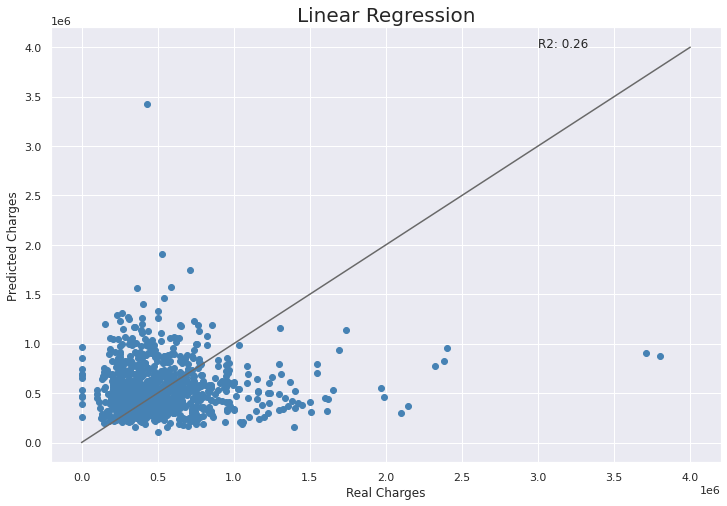

In [ ]:
plt.scatter(y_test, y_pred_test_lr, c='steelblue')
plt.plot([0,4000000], [0,4000000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_lr,2)), [3000000, 4000000])
plt.title('Linear Regression', fontsize=20)
plt.show()

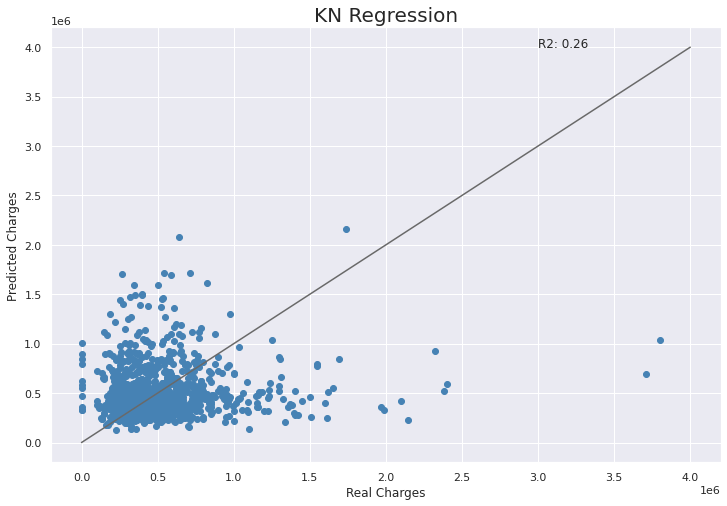

In [ ]:
plt.scatter(y_test, y_pred_test_kn, c='steelblue')
plt.plot([0,4000000], [0,4000000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_lr,2)), [3000000, 4000000])
plt.title('KN Regression', fontsize=20)
plt.show()

In [ ]:
plt.scatter(y_test, y_pred_test_dt, c='steelblue')
plt.plot([0,4000000], [0,4000000], c='dimgrey')
plt.xlabel('Real Charges')
plt.ylabel('Predicted Charges')
plt.annotate('R2: ' + str(round(r2_lr,2)), [3000000, 4000000])
plt.title('Linear Regression', fontsize=20)
plt.show()